In [62]:
!curl https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/Exercise/AB_NYC_2019.csv > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6912k  100 6912k    0     0  3268k      0  0:00:02  0:00:02 --:--:-- 3268k


In [63]:
!ls

data.csv   main.ipynb


In [64]:
!pip3 install pandas numpy seaborn matplotlib scikit-learn

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [66]:
df = pd.read_csv("data.csv")

In [67]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [68]:
df.shape

(48895, 16)

In [69]:
df = df.sample(frac=True, random_state=42)
df.reset_index(drop=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,2019-01-02,0.71,1,189
1,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,NaN,NaN,1,73
2,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,2017-04-28,0.43,1,0
3,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,2019-06-02,1.88,327,272
4,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,2019-06-03,0.80,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8754339,Gran Fondo Cyclist Haven,20261309,Sarah,Manhattan,Washington Heights,40.84650,-73.94319,Shared room,60,1,0,NaN,NaN,1,0
48891,34383329,"A private bedroom in Chelsea , Manhattan.",53254710,Aamito,Manhattan,Chelsea,40.73957,-74.00082,Private room,85,2,4,2019-06-30,1.90,1,76
48892,30109697,Nicely appointed BIG one bedroom off Central Park,1385157,Brian,Manhattan,Upper West Side,40.78318,-73.97372,Entire home/apt,130,30,1,2019-04-12,0.34,5,261
48893,304799,Penthouse Studio by Central Park,185753,Carolyn,Manhattan,Upper West Side,40.77508,-73.97990,Entire home/apt,150,2,11,2019-06-09,0.13,1,2


In [70]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

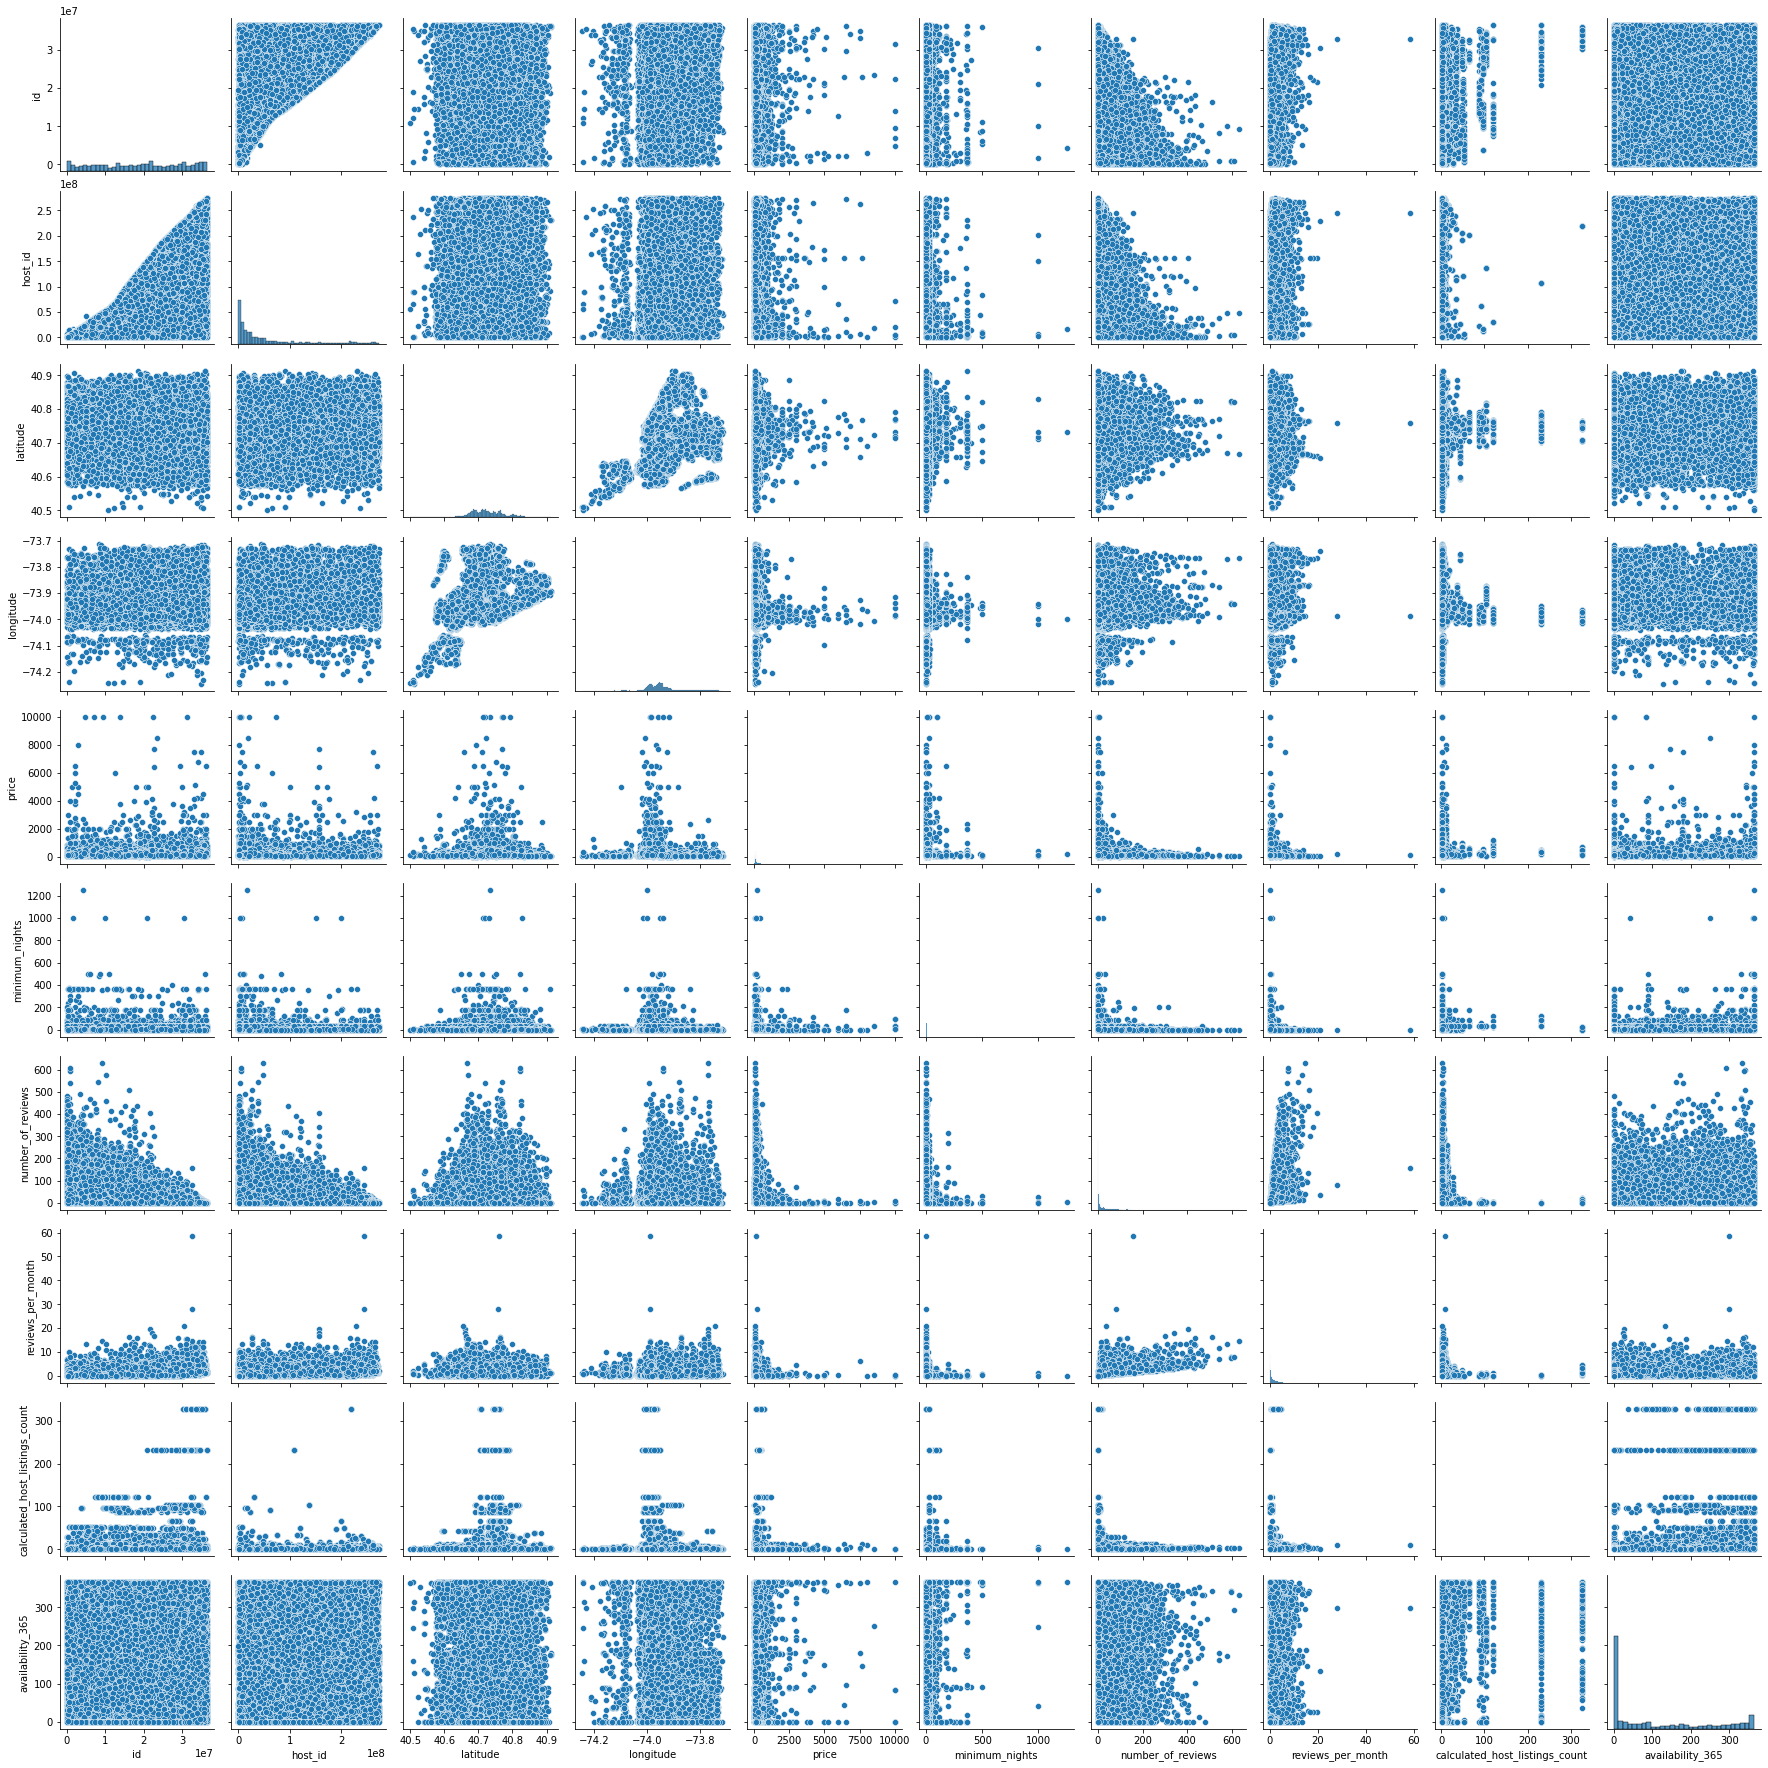

In [71]:
# sns.pairplot(df)

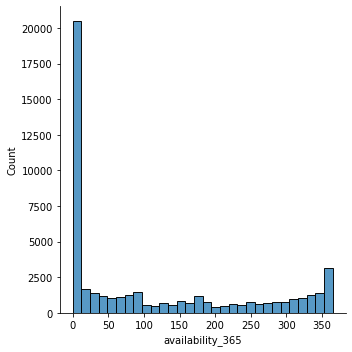

In [72]:
sns.displot(df.availability_365)

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [74]:
df = df.iloc[:, 2:]

In [75]:
df.isna().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.shape

(38827, 14)

In [78]:
df.isna().sum()


host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [79]:
df.room_type.value_counts()

Entire home/apt    20326
Private room       17655
Shared room          846
Name: room_type, dtype: int64

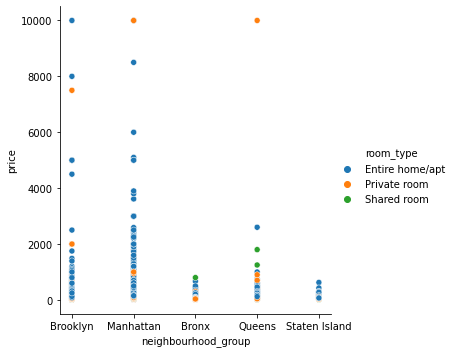

In [80]:
sns.relplot(y='price', x='neighbourhood_group', hue='room_type', data=df)


In [81]:
min_thresold , max_thresold  = df.price.quantile([0.05, 0.95])
print (min_thresold, max_thresold)

40.0 330.0


In [82]:
df = df[ df.price < max_thresold ]
df = df[ df.price > min_thresold ]

In [83]:
df.shape

(34700, 14)

In [86]:
df.price.describe()

count    34700.000000
mean       123.172392
std         64.515920
min         41.000000
25%         70.000000
50%        104.000000
75%        160.000000
max        329.000000
Name: price, dtype: float64

In [85]:
df.sample(frac=True)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30193,122374980,Matt,Manhattan,Upper West Side,40.78648,-73.97923,Shared room,60,1,34,2019-06-22,2.01,4,363
45324,167043905,DeAnn,Brooklyn,Flatlands,40.62281,-73.93446,Private room,200,1,3,2019-06-02,2.05,1,87
22387,62680545,Juan Felipe,Manhattan,Upper West Side,40.79795,-73.96199,Entire home/apt,175,5,2,2017-08-04,0.08,1,4
41366,219517861,Sonder (NYC),Manhattan,Financial District,40.70564,-74.01162,Private room,204,2,4,2019-04-29,0.96,327,327
33122,96664487,Hupeto,Brooklyn,Bushwick,40.68725,-73.91623,Entire home/apt,163,3,20,2019-06-03,1.59,3,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,30283594,Kara,Manhattan,Upper East Side,40.76391,-73.95938,Entire home/apt,249,30,2,2018-07-28,0.10,121,273
1977,4509849,Ines,Brooklyn,Bedford-Stuyvesant,40.68344,-73.92189,Private room,65,3,132,2019-06-30,1.68,3,35
15583,24225572,Monica,Brooklyn,Williamsburg,40.71353,-73.95261,Private room,90,2,15,2019-06-16,1.05,1,6
25673,58231083,Seo Hee,Manhattan,Morningside Heights,40.80389,-73.96541,Private room,50,2,2,2017-09-04,0.09,1,0
